In [58]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("../data/WHO-SIMPLE.csv")

## The code below eliminates columns with less than 500 actual values, and rows with less than 52.7% cells populated

In [59]:
#Examine data frame and determine which year has the most complete data set
df.head()
df.describe()

df.groupby(['Year']).count().sum(axis=1)
df = df.dropna(thresh=500, axis=1)


df['SUM'] = df.count(axis=1)
df = df[df['SUM'] >= 19]

In [60]:
len(df.columns)

30

## Below is MLR Code, we must first preprocess

In [61]:
def scatterplot_2vars(df, x, y):
    plt.scatter(df[x], df[y], color='green')
    plt.title('{} Vs {}'.format(x,y), fontsize=14)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.grid(True)
    plt.show()

def histogram(df, x):
    plt.hist(df[x], bins="auto", range=(0,df[x].max()))
    plt.title('{}'.format(x), fontsize=14)
    plt.xlabel(x, fontsize=14)
    plt.grid(True)
    plt.show()

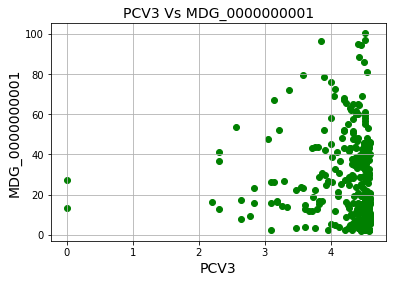

C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\numpy\lib\histograms.py:393: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\numpy\lib\histograms.py:394: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


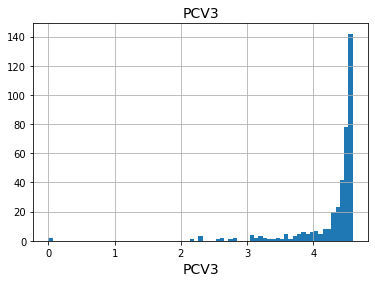

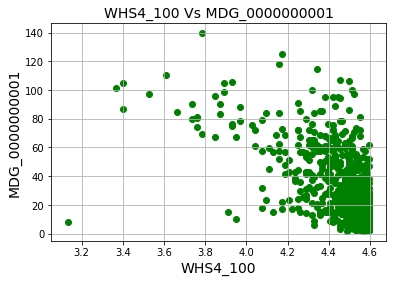

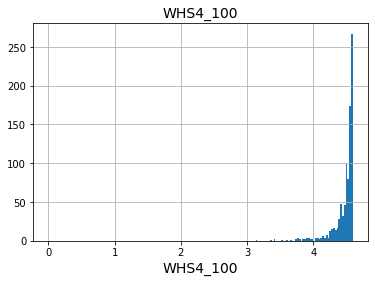

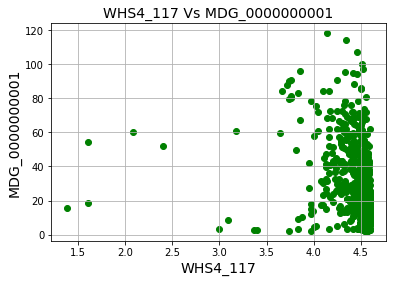

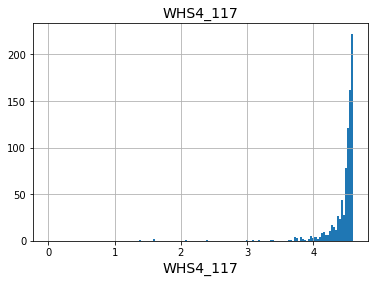

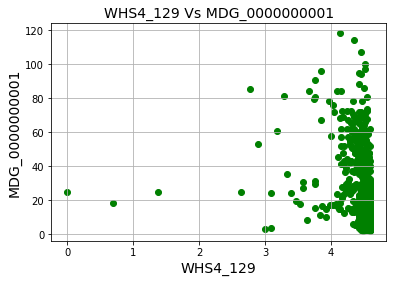

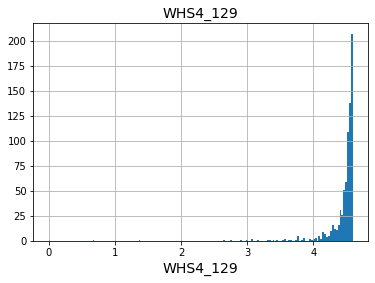

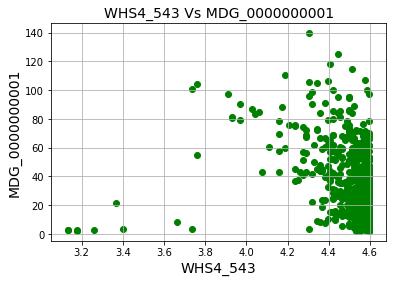

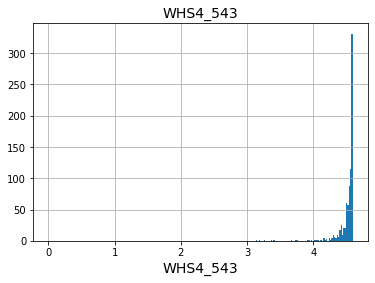

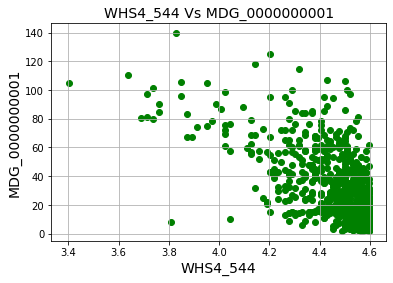

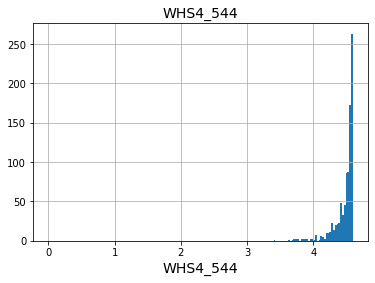

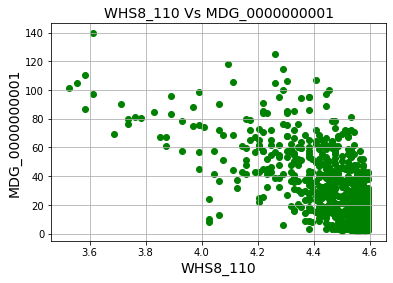

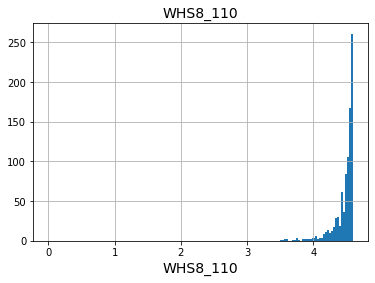

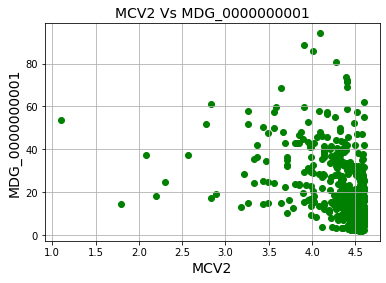

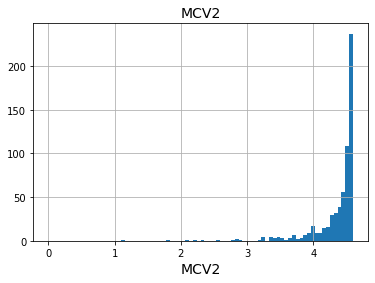

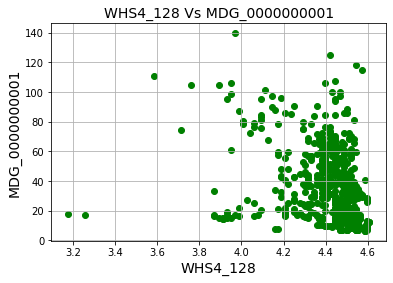

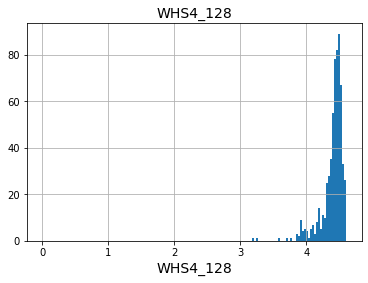

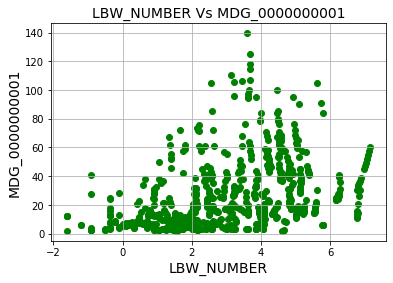

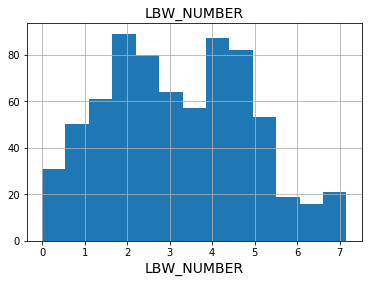

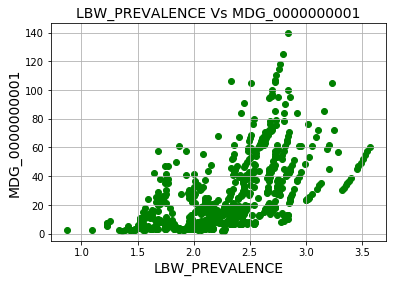

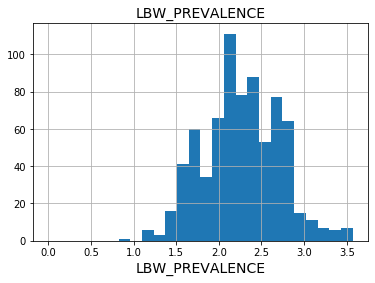

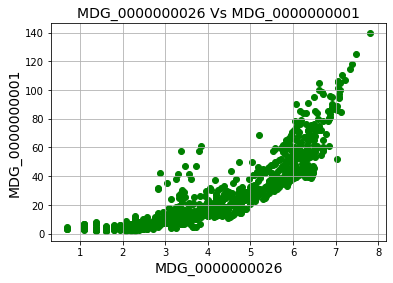

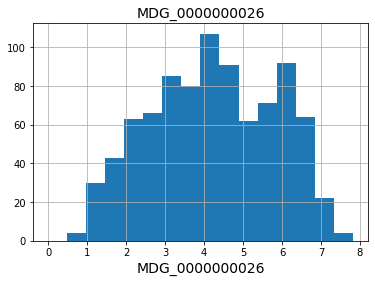

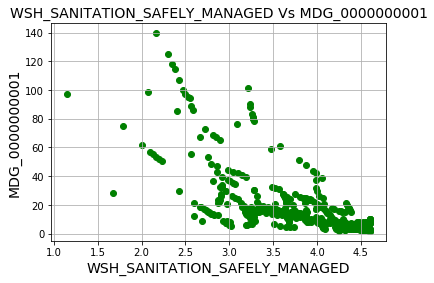

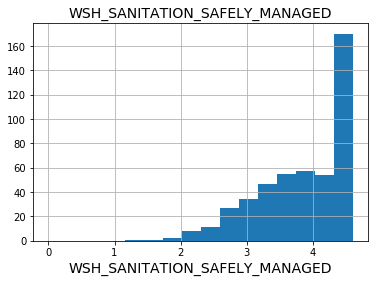

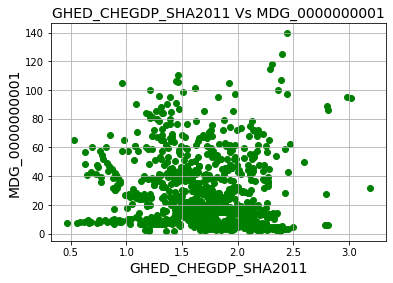

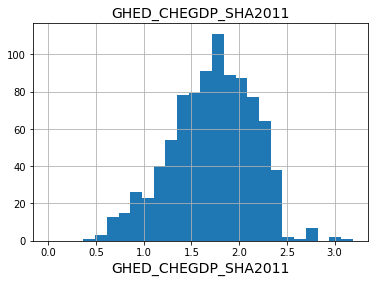

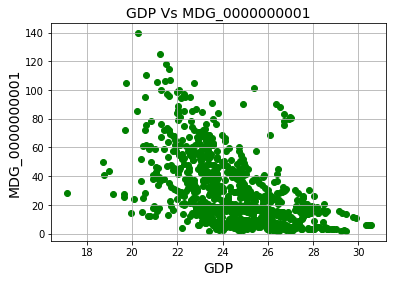

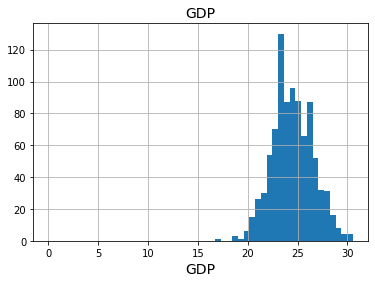

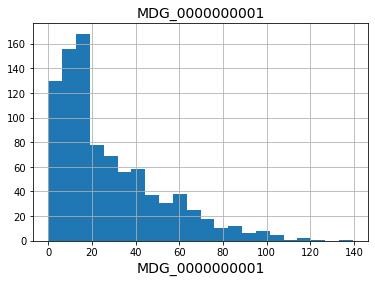

In [62]:
#This is to examine if the relationships are linear. Not all are, but many are good! A few may need a 
# transformation (ie GDP) and a few may not work ultimately
columns_of_interest = ['PCV3',#'ROTAC','NUTRITION_564',
                       'WHS4_100','WHS4_117','WHS4_129','WHS4_543','WHS4_544','WHS8_110',
                       'MCV2','WHS4_128','LBW_NUMBER','LBW_PREVALENCE',
                       #'NUTRITION_HA_2','NUTRITION_WA_2',#'NUTRITION_WH2','NUTRITION_WH_2','WHOSIS_000006',
                       'MDG_0000000026','WSH_SANITATION_SAFELY_MANAGED',
                       #'WHS9_95','WHS_PBR','WSH_2','WSH_3',
                       #'M_Est_smk_curr','M_Est_smk_daily','TOBACCO_0000000192',
                       'GHED_CHEGDP_SHA2011','GDP']

df_transformed = df.copy()
#df_transformed['GDP'] = np.log(df['GDP'])
#df_transformed['LBW_NUMBER'] = np.log(df['LBW_NUMBER'])
#df_transformed['LBW_NUMBER'] = np.log(df['LBW_NUMBER'])
log_col_transform = ['GDP','LBW_NUMBER','LBW_PREVALENCE','MDG_0000000026','GHED_CHEGDP_SHA2011']
#for col in log_col_transform:
    #df_transformed[col] = np.log(df[col])

for col in columns_of_interest:
    df_transformed[col] = np.log(df[col])
    scatterplot_2vars(df_transformed, col, 'MDG_0000000001')
    histogram(df_transformed, col)

histogram(df_transformed, 'MDG_0000000001')

In [63]:
counts = df.count()
counts

Country_Year                     910
MDG_0000000001                   910
PCV3                             392
ROTAC                            295
WHS4_100                         910
WHS4_117                         835
WHS4_129                         755
WHS4_543                         820
WHS4_544                         910
WHS8_110                         910
MCV2                             629
NUTRITION_564                    318
WHS4_128                         614
LBW_NUMBER                       744
LBW_PREVALENCE                   744
NUTRITION_HA_2                   421
NUTRITION_WA_2                   418
NUTRITION_WH2                    406
NUTRITION_WH_2                   420
WHOSIS_000006                    289
MDG_0000000026                   884
WSH_SANITATION_SAFELY_MANAGED    467
M_Est_smk_curr                   466
M_Est_smk_daily                  466
TOBACCO_0000000192               339
GHED_CHEGDP_SHA2011              902
Country Code                     910
Y

In [64]:
haveNAN = df.columns[df.isnull().any()]


In [65]:
df['PCV3'].value_counts(sort=False,dropna=False)

NaN     518
65.0      1
55.0      4
99.0     37
98.0     25
       ... 
9.0       1
35.0      1
42.0      1
25.0      1
21.0      1
Name: PCV3, Length: 76, dtype: int64

In [66]:
bins = df['PCV3'].value_counts(bins=100, sort=False,dropna=False)

In [67]:
df['PCV3'] = df['PCV3'].fillna(-1)

In [70]:
############################THIS IS THE POTENTIAL HOLY GRAIL CELL################################
df['PCV3'] = pd.cut(df['PCV3'], bins=100, right=False)

In [71]:
df.head()

,Country_Year,MDG_0000000001,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_543,WHS4_544,WHS8_110,...,MDG_0000000026,WSH_SANITATION_SAFELY_MANAGED,M_Est_smk_curr,M_Est_smk_daily,TOBACCO_0000000192,GHED_CHEGDP_SHA2011,Country Code,Year,GDP,SUM
51,AFG_2013,57.22515,"[-1.0, 0.0)",NaN,64.0,64.0,64.0,72.0,64.0,57.0,...,810.0,NaN,NaN,NaN,NaN,8.81,AFG,2013.0,2.056107e+10,19
56,AFG_2018,48.04333,"[65.0, 66.0)",45.0,66.0,66.0,66.0,78.0,73.0,64.0,...,NaN,NaN,NaN,NaN,NaN,9.40,AFG,2018.0,1.835388e+10,20
85,AGO_2007,90.49068,"[-1.0, 0.0)",NaN,48.0,43.0,43.0,75.0,43.0,58.0,...,431.0,NaN,NaN,NaN,NaN,2.97,AGO,2007.0,6.526645e+10,20
93,AGO_2015,57.81665,"[55.0, 56.0)",40.0,59.0,55.0,55.0,64.0,57.0,51.0,...,251.0,NaN,NaN,NaN,NaN,2.61,AGO,2015.0,1.161936e+11,20
120,ALB_2000,24.09920,"[-1.0, 0.0)",NaN,97.0,96.0,NaN,93.0,97.0,95.0,...,23.0,38.61018,NaN,NaN,11.6,7.23,ALB,2000.0,3.480355e+09,23


In [72]:
df['PCV3'].value_counts()

[-1.0, 0.0)     518
[98.0, 99.1)     62
[92.0, 93.0)     22
[93.0, 94.0)     20
[94.0, 95.0)     18
               ... 
[40.0, 41.0)      0
[38.0, 39.0)      0
[34.0, 35.0)      0
[33.0, 34.0)      0
[15.0, 16.0)      0
Name: PCV3, Length: 100, dtype: int64

In [24]:
#This was good for experimentation, but it creates a factor for every unique value, and since
#the values aren't ordered, it's basically useless besides telling us that -1 is for missing values
codes, uniques = pd.factorize(df['PCV3'])

In [25]:
codes

array([-1,  0, -1,  1, -1, -1, -1, -1,  2,  2,  2,  2,  2,  3, -1,  4,  5,
        2,  2,  2, -1,  6,  7,  8, -1, -1, -1, -1,  9,  4, -1, 10, 10, 10,
       11, -1, -1, -1, -1, -1, -1, -1, -1, -1, 12, -1, -1, -1,  5, 13,  4,
        4, -1, 11, 11,  4, -1, -1, 14, 15, -1, -1, -1, -1, -1, -1, -1, 10,
       10, 10, 10, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 16,
       -1, -1, 15,  4, 17, 18, -1, 19,  5,  2,  2,  2,  2,  3,  3,  2, 20,
       21,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, 22, 23, 24, -1, -1, -1, -1, -1, -1, 25,  8, 26,  4, 11,  4, 27,
       27, -1, -1, -1, -1, -1, -1, -1, -1, 28, 29, 13, 11, 10, -1, -1, 30,
       31, 32, 33, 21, 34, -1, -1, -1, -1, -1, -1, -1, -1,  8, 33, 17, 18,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 35, 27, 36, 37, 14, -1,
       -1, -1, -1, -1, 38, 39, 40, -1, -1, -1, -1, -1, 41, 42, 27, 24,  7,
       10,  7, -1, -1, -1,  4,  7, 36, -1, -1, -1, -1, -1, -1, -1, -1, 39,
       27, 27, 27, -1, 26

In [28]:
uniques

Float64Index([65.0, 55.0, 99.0, 98.0, 94.0, 96.0, 41.0, 89.0, 82.0, 44.0, 91.0,
              93.0, 64.0, 95.0, 67.0, 69.0, 48.0, 92.0, 90.0, 14.0,  1.0, 37.0,
              56.0, 86.0, 87.0, 24.0, 88.0, 84.0, 52.0, 72.0, 47.0, 58.0, 73.0,
              79.0, 62.0, 23.0, 83.0, 77.0, 10.0, 85.0, 80.0, 22.0, 46.0, 27.0,
              61.0, 17.0, 71.0, 81.0, 60.0, 63.0, 16.0, 75.0, 43.0, 97.0, 32.0,
              51.0, 50.0, 78.0, 74.0, 68.0, 45.0, 39.0, 29.0, 76.0, 28.0, 57.0,
              26.0, 13.0, 49.0, 36.0,  9.0, 35.0, 42.0, 25.0, 21.0],
             dtype='float64')

In [57]:
x_and_y_cols = columns_of_interest.copy()
x_and_y_cols.append('MDG_0000000001')
df_no_nan = df_transformed[x_and_y_cols].copy().dropna()
X = df_no_nan[columns_of_interest] # Our multiple variables
Y = df_no_nan['MDG_0000000001']

In [58]:
len(X)


66

In [59]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 9.001983130683147
Coefficients: 
 [-0.01077173  0.82582811 -0.58754481 -0.27792522  0.17801415  0.24459802
 -0.28625995  0.05176226 -0.01563795  1.27306776  0.42134447  0.05680726
 -0.00147089  0.54539594 -0.80365722]
                            OLS Regression Results                            
Dep. Variable:         MDG_0000000001   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     146.8
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           6.38e-36
Time:                        15:46:41   Log-Likelihood:                -131.34
No. Observations:                  66   AIC:                             294.7
Df Residuals:                      50   BIC:                             329.7
Df Model:                          15                                         
Covariance Type:            nonrobust                     

In [19]:
model.conf_int()

,0,1
const,-31.452052,49.456018
PCV3,-0.040932,0.019389
WHS4_100,-1.006364,2.658020
WHS4_117,-1.156736,-0.018354
WHS4_129,-2.338917,1.783066
WHS4_543,-0.071755,0.427783
WHS4_544,0.056652,0.432544
WHS8_110,-0.447578,-0.124942
MCV2,0.007955,0.095570
WHS4_128,-0.145585,0.114309
